In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV data
df = pd.read_csv('/content/drive/MyDrive/startup_data.csv')

# Perform data preprocessing (one-hot encoding)
df_encoded = pd.get_dummies(df)

# Separate features (X) and target variable (y)
X = df_encoded.drop("Funding Amount in $", axis=1)  # Adjust target column if needed
y = df_encoded["Funding Amount in $"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Absolute Error: 361725784.8109344
Mean Squared Error: 3.1879084353021146e+17
R-squared: -0.658784762951474


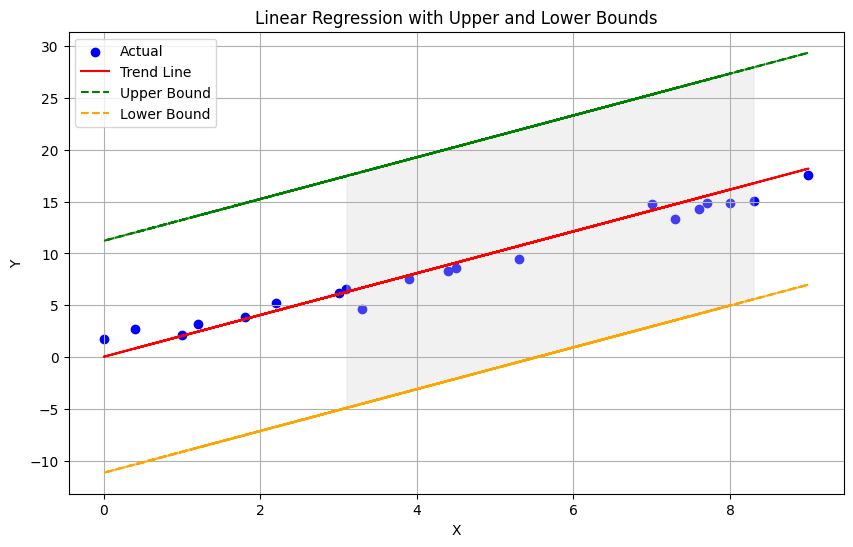

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data (replace this with your actual data loading and preprocessing)
np.random.seed(0)
X = np.arange(0, 10, 0.1).reshape(-1, 1)
y = 2 * X + np.random.normal(0, 1, size=X.shape[0]).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate upper and lower bounds
upper_bound = y_pred + 1.96 * np.std(y_pred)
lower_bound = y_pred - 1.96 * np.std(y_pred)

# Plot the actual data, trend line, upper bound, and lower bound
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Trend Line')
plt.plot(X_test, upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.plot(X_test, lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.fill_between(X_test.flatten(), upper_bound.flatten(), lower_bound.flatten(), color='lightgray', alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Upper and Lower Bounds')
plt.legend()
plt.grid(True)
plt.show()

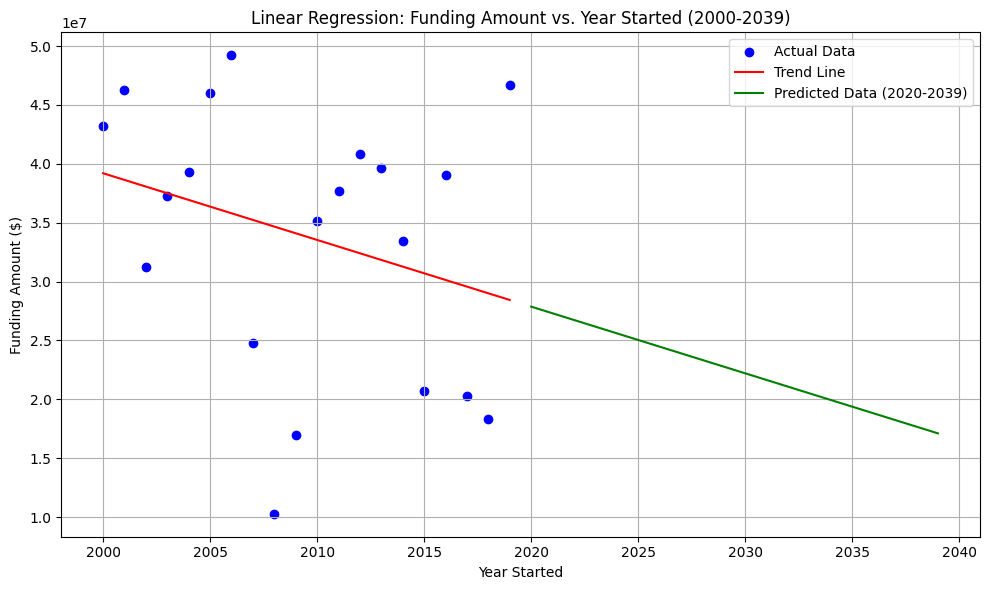

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data for 20 years (2000-2019)
years_started = np.arange(2000, 2020)
funding_amount = np.random.randint(1000000, 50000000, size=len(years_started)).reshape(-1, 1)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(years_started.reshape(-1, 1), funding_amount)

# Predict funding amount for the years 2020-2039
future_years = np.arange(2020, 2040)
future_funding = model.predict(future_years.reshape(-1, 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(years_started, funding_amount, color='blue', label='Actual Data')
plt.plot(years_started, model.predict(years_started.reshape(-1, 1)), color='red', label='Trend Line')
plt.plot(future_years, future_funding, color='green', label='Predicted Data (2020-2039)')
plt.xlabel('Year Started')
plt.ylabel('Funding Amount ($)')
plt.title('Linear Regression: Funding Amount vs. Year Started (2000-2039)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2000, 2041, 5))  # Set x-axis ticks for every 5 years
plt.tight_layout()
plt.show()